## Resampling/Permutation Tests

In this notebook, we'll see how we can perform a permutation test to determine if two populations have the same distribution.

For more information about permutation testing, see these notes: http://faculty.washington.edu/yenchic/18W_425/Lec3_permutation.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Example 1:** In this example, we'll look at the number of minutes spent sleeping reported to the American Time Use Survey.

Specifically, we'll be comparing the amount of time spent sleeping reported by males to the amount reported by females.

**Null Hypothesis:** The distribution of the time spent sleeping by females is the same as the distribution for males.

**Alternative Hypothesis:** The distribution of the time spent sleeping by females has a higher mean than the distribution for males.

To assess this, we'll look at the mean minutes by group.

In [2]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')
sleeping.head(2)

,participant_id,minutes_spent_sleeping,sex
0,20181211181182,270,Male
1,20180908180663,600,Male


In [3]:
group_means = sleeping[['minutes_spent_sleeping', 'sex']].groupby('sex')['minutes_spent_sleeping'].mean()
group_means

sex
Female    582.32
Male      519.60
Name: minutes_spent_sleeping, dtype: float64

In [4]:
observed_difference = group_means['Female'] - group_means['Male']
observed_difference

62.72000000000003

To perform a permutation test, we need to shuffle the labels, then at the new difference observed by group.

In [5]:
num_group1 = len(sleeping.loc[sleeping['sex'] == 'Female'])     # How many observations were female?
values = sleeping['minutes_spent_sleeping'].tolist()            # Extract the values column as a list
values[:5]

[270, 600, 355, 405, 270]

In [6]:
# Then, use the shuffle method from numpy to permute the values
np.random.shuffle(values)
values[:5]

[575, 540, 560, 660, 775]

In [7]:
# Finally, look at the permuted differences
# We can allocate the beginning of the shuffled values to females and the remainder to males.
np.mean(values[:num_group1]) - np.mean(values[num_group1:])

23.43999999999994

Let's automate this process using a for loop.

In [8]:
df = sleeping
column = 'minutes_spent_sleeping'
groups = 'sex'
group1 = 'Female'

permutation_differences = []
values = df[column].tolist()
num_group1 = len(df[df[groups] == group1])

for _ in range(10000):
    np.random.shuffle(values)
    permutation_differences.append(np.mean(values[:num_group1]) - np.mean(values[num_group1:]))
    
permutation_differences = np.array(permutation_differences)

Now, we can compare the distribution of permutation differences to the observed difference.

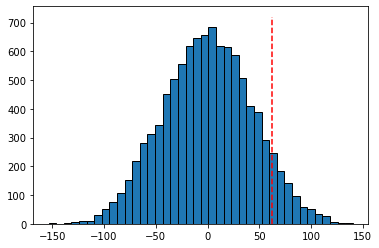

In [9]:
plt.hist(permutation_differences, bins = 40, edgecolor = 'black')
ymin, ymax = plt.ylim()
plt.vlines(x = observed_difference,
           ymin = ymin,
           ymax = ymax,
           linestyle = '--',
           color = 'red');

Finally, see for what proportion of permutations, we saw at least as extreme a difference in means.

In [10]:
(permutation_differences >= observed_difference).mean()

0.0749

**Question:** What is our conclusion?



**Example 2:** In this example, we'll look at the number of minutes spent grooming reported to the American Time Use Survey. 

**Null Hypothesis:** The distribution of the time spent grooming by females is the same as the distribution for males.

**Alternative Hypothesis:** The distribution of the time spent grooming by females has a higher mean than the distribution for males.

In [11]:
grooming = pd.read_csv('../data/atus_grooming.csv')

In [12]:
grooming.head()

,participant_id,minutes_spent_grooming,sex
0,20180301182171,30,Male
1,20180807181204,0,Male
2,20180807181773,10,Male
3,20180403182157,0,Male
4,20180605181860,31,Male


In [13]:
group_means = grooming[['minutes_spent_grooming', 'sex']].groupby('sex')['minutes_spent_grooming'].mean()
observed_difference = group_means['Female'] - group_means['Male']
observed_difference

20.68

In [20]:
df = grooming
column = 'minutes_spent_grooming'
groups = 'sex'
group1 = 'Female'

permutation_differences = []
values = df[column].tolist()
num_group1 = len(df[df[groups] == group1])

for _ in range(10000):
    np.random.shuffle(values)
    permutation_differences.append(np.mean(values[:num_group1]) - np.mean(values[num_group1:]))
    
permutation_differences = np.array(permutation_differences)

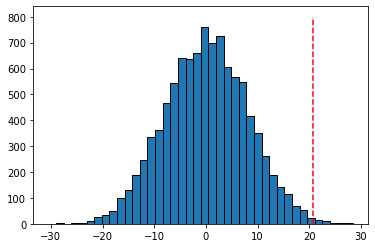

In [21]:
plt.hist(permutation_differences, bins = 40, edgecolor = 'black')
ymin, ymax = plt.ylim()
plt.vlines(x = observed_difference,
           ymin = ymin,
           ymax = ymax,
          linestyle = '--',
          color = 'red');

In [22]:
(permutation_differences >= observed_difference).mean()

0.0039

**Question:** What is our conclusion?